In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt
import random

In [3]:
abstracts = [
    "This paper explores the impact of artificial intelligence on healthcare.",
    "We present a novel approach to machine learning in the context of predictive analytics.",
    "The study investigates the role of big data in enhancing decision-making processes.",
    "A comprehensive review of recent advancements in neural networks.",
    "An analysis of blockchain technology and its applications in various industries.",
    "Exploring the ethical implications of AI in modern society.",
    "A detailed study on the integration of IoT devices in smart homes.",
    "The paper discusses the future of quantum computing and its potential impacts.",
    "A survey of cybersecurity challenges in the digital age.",
    "Investigating the benefits and risks of autonomous vehicles.",
    "A novel framework for edge computing in the Internet of Things.",
    "An empirical study on the effects of social media on mental health.",
    "The impact of climate change on agricultural productivity.",
    "A meta-analysis of deep learning techniques for image recognition.",
    "Blockchain for secure and transparent supply chain management.",
    "The role of wearable technology in personal fitness and health monitoring.",
    "A comparative study of natural language processing algorithms.",
    "Exploring the potential of renewable energy sources in urban environments.",
    "The effects of virtual reality on education and training.",
    "Analyzing the privacy concerns of facial recognition technology.",
    "The future of 5G technology and its applications.",
    "The relationship between data privacy and consumer trust.",
    "A study on the efficiency of various sorting algorithms.",
    "The use of gamification in improving user engagement.",
    "The development of autonomous drones for delivery services.",
    "Investigating the role of AI in personalized medicine.",
    "The application of machine learning in financial fraud detection.",
    "A comprehensive review of sentiment analysis techniques.",
    "The impact of telemedicine on patient outcomes.",
    "An overview of quantum cryptography and its security implications.",
    "The influence of big data on marketing strategies.",
    "The role of AI in disaster response and management.",
    "A study on the adoption of electric vehicles in urban areas.",
    "The use of AI in predictive maintenance for manufacturing.",
    "Exploring the ethical challenges of genetic engineering.",
    "The impact of digital currencies on global finance.",
    "A review of advanced materials for sustainable energy storage.",
    "The potential of AI in enhancing cybersecurity measures.",
    "The effects of machine learning on drug discovery and development.",
    "An analysis of smart grid technology and its benefits.",
    "The role of IoT in improving agricultural efficiency.",
    "A survey of neural network architectures for natural language processing.",
    "The use of blockchain for secure voting systems.",
    "An investigation into the impact of AI on job markets.",
    "The benefits of cloud computing for small businesses.",
    "A comparative analysis of traditional vs. digital marketing.",
    "The role of AI in enhancing customer service experiences.",
    "The future of autonomous public transportation systems.",
    "The use of AI in detecting and preventing cybersecurity threats."
]

citations = np.random.randint(50, 250, size=len(abstracts)).tolist()

# TO-DO: quantify importance and complexity
# the "importance" of paper i should reflect how necessary it is to read paper i to understand research in its particular cluster 
# (e.g., a seminal paper would have a high importance score)
# Update: We plan to use PageRank to calculate importance scores (PR-scores) - see './pagerank.ipynb' 

# the "complexity" of paper i should express how dependent understanding paper i is on understanding other papers in its cluster

data = {
    'abstract': abstracts,
    'citations': citations,
    'importance_score': np.random.rand(len(abstracts)),  # Random importance score
    'complexity_score': np.random.rand(len(abstracts))   # Random complexity score
}

df = pd.DataFrame(data)

In [4]:
df.head()

,abstract,citations,importance_score,complexity_score
0,This paper explores the impact of artificial i...,176,0.486605,0.641311
1,We present a novel approach to machine learnin...,209,0.401835,0.470038
2,The study investigates the role of big data in...,116,0.935731,0.916346
3,A comprehensive review of recent advancements ...,246,0.751053,0.571791
4,An analysis of blockchain technology and its a...,136,0.915670,0.634941


In [5]:
# Step 1: Feature extraction and clustering
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['abstract'])

# Use PCA to reduce dimensionality
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Clustering using KMeans
n_clusters = 5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_reduced)
df['cluster'] = clusters

/Users/nikhilvaidyanathan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


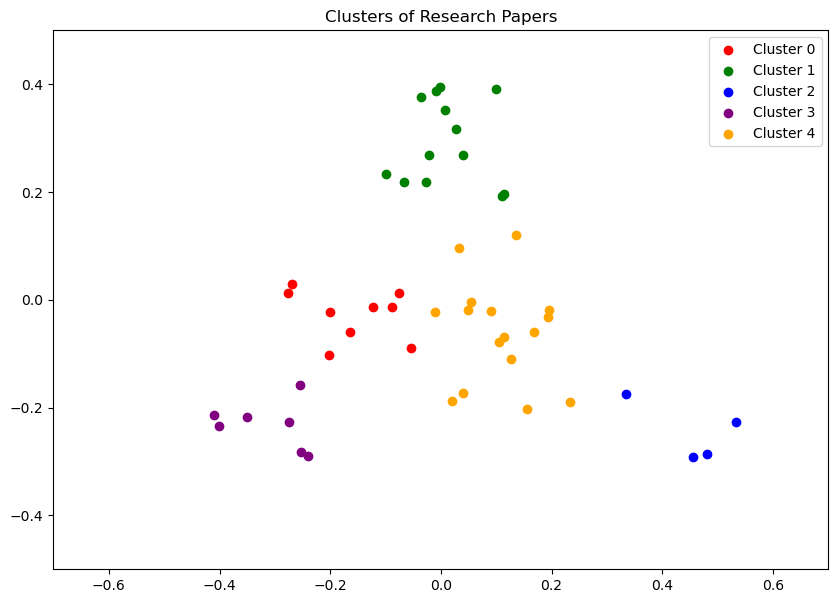

In [6]:
plt.figure(figsize=(10, 7))
plt.axis([-0.7, 0.7, -0.5, 0.5])
colors = ['red', 'green', 'blue', 'purple', 'orange']
for cluster in range(n_clusters):
    cluster_points = X_reduced[df['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[cluster], label=f'Cluster {cluster}')
plt.legend()
plt.title('Clusters of Research Papers')
plt.show()

In [7]:
# Step 2: Sparsify clusters to find n most important papers
# Update: We plan to use PageRank to calculate importance scores (PR-scores) - see './pagerank.ipynb' 
n = 5  # Number of most important papers to keep per cluster
important_papers = df.groupby('cluster').apply(lambda x: x.nlargest(n, 'importance_score')).droplevel(0)

In [8]:
# Sanity check
df[df['cluster'] == 0].sort_values(by=['importance_score'], ascending=False)

,abstract,citations,importance_score,complexity_score,cluster
2,The study investigates the role of big data in...,116,0.935731,0.916346,0
17,Exploring the potential of renewable energy so...,126,0.860680,0.724872,0
34,Exploring the ethical challenges of genetic en...,133,0.838455,0.137932,0
26,The application of machine learning in financi...,197,0.769217,0.564109,0
10,A novel framework for edge computing in the In...,241,0.687176,0.609962,0
40,The role of IoT in improving agricultural effi...,237,0.638594,0.843159,0
1,We present a novel approach to machine learnin...,209,0.401835,0.470038,0
8,A survey of cybersecurity challenges in the di...,169,0.194248,0.924001,0
23,The use of gamification in improving user enga...,58,0.083470,0.023339,0


In [9]:
important_papers[important_papers['cluster'] == 0]

,abstract,citations,importance_score,complexity_score,cluster
2,The study investigates the role of big data in...,116,0.935731,0.916346,0
17,Exploring the potential of renewable energy so...,126,0.860680,0.724872,0
34,Exploring the ethical challenges of genetic en...,133,0.838455,0.137932,0
26,The application of machine learning in financi...,197,0.769217,0.564109,0
10,A novel framework for edge computing in the In...,241,0.687176,0.609962,0


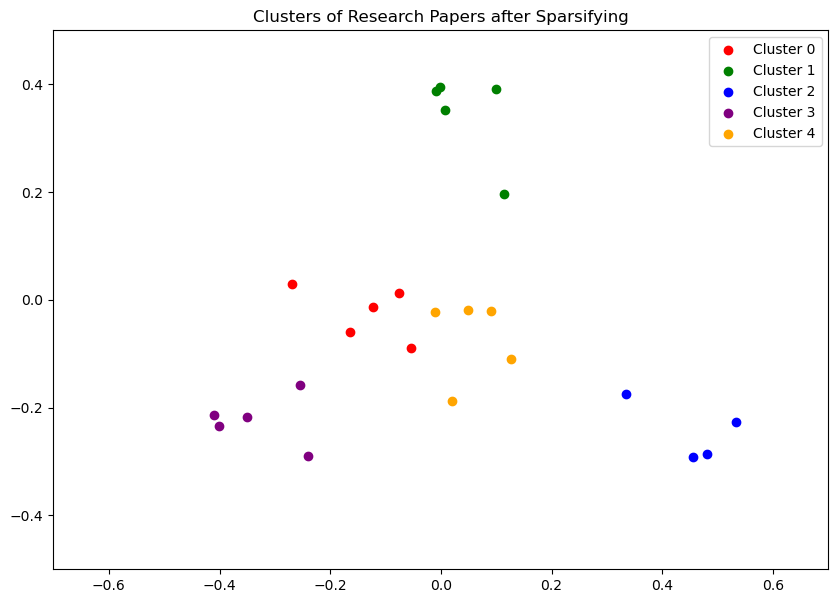

In [10]:
# Need to correctly match the indices for the reduced feature space and the sparsified DataFrame
important_indices = important_papers.index
X_reduced_important = X_reduced[important_indices]

# Redraw the graph with clusters in different colors after sparsifying
plt.figure(figsize=(10, 7))
plt.axis([-0.7, 0.7, -0.5, 0.5])
for cluster in range(n_clusters):
    cluster_points = X_reduced_important[important_papers['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[cluster], label=f'Cluster {cluster}')
plt.legend()
plt.title('Clusters of Research Papers after Sparsifying')
plt.show()

In [11]:
# Step 3: Create a directed graph for each sparsified cluster
def create_directed_graph(cluster_df):
    G = nx.DiGraph()
    for i, paper_i in cluster_df.iterrows():
        coords = X_reduced[i]
        G.add_node(i, pos=(coords[0], coords[1]))
        
    for i, paper_i in cluster_df.iterrows():
        for j, paper_j in cluster_df.iterrows():
            if i != j and paper_i['complexity_score'] < paper_j['complexity_score']:
                weight = paper_j['complexity_score'] - paper_i['complexity_score']
                G.add_edge(paper_i.name, paper_j.name, weight=weight)
    return G

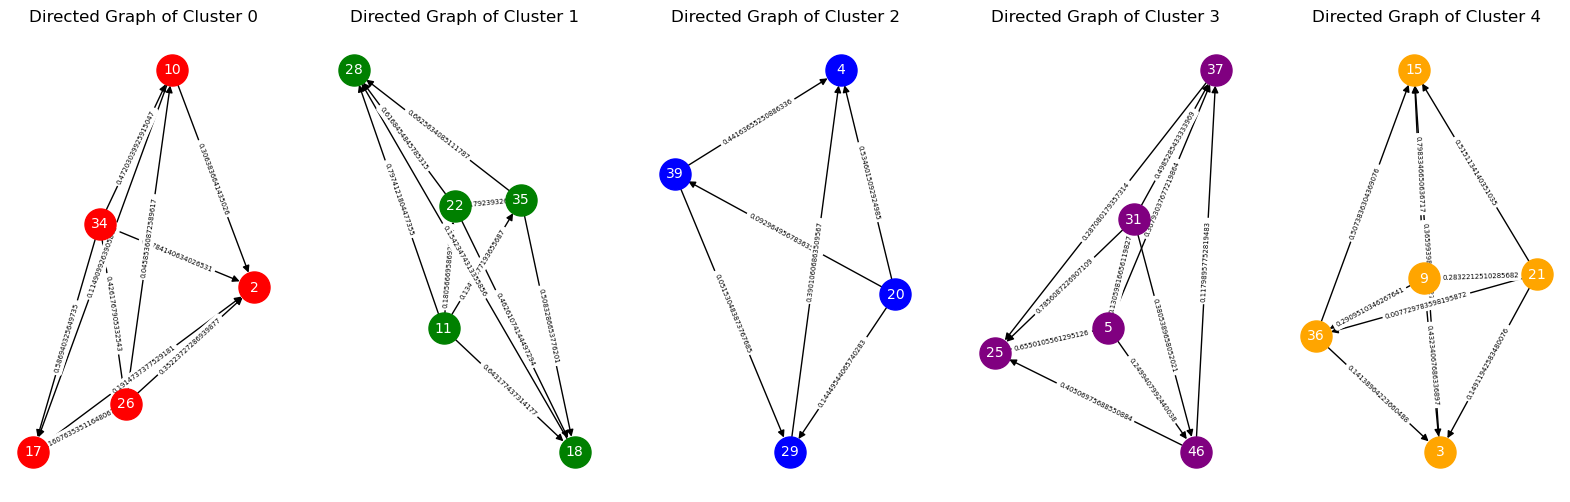

In [12]:
fig, axs = plt.subplots(1, 5, figsize=(20, 6))
digraphs = []
for cluster in range(n_clusters):
    cluster_papers = important_papers[important_papers['cluster'] == cluster]
    digraph = create_directed_graph(cluster_papers)
    digraphs.append(digraph)
    pos = nx.spring_layout(digraph)
    axs[cluster].set_title(f'Directed Graph of Cluster {cluster}')
    nx.draw(digraph, pos, with_labels=True, node_color=colors[cluster], node_size=500, font_size=10, font_color='white', ax=axs[cluster])
    edge_labels = nx.get_edge_attributes(digraph, 'weight')
    nx.draw_networkx_edge_labels(digraph, pos, edge_labels=edge_labels, font_size=5, ax=axs[cluster])
    
plt.show()

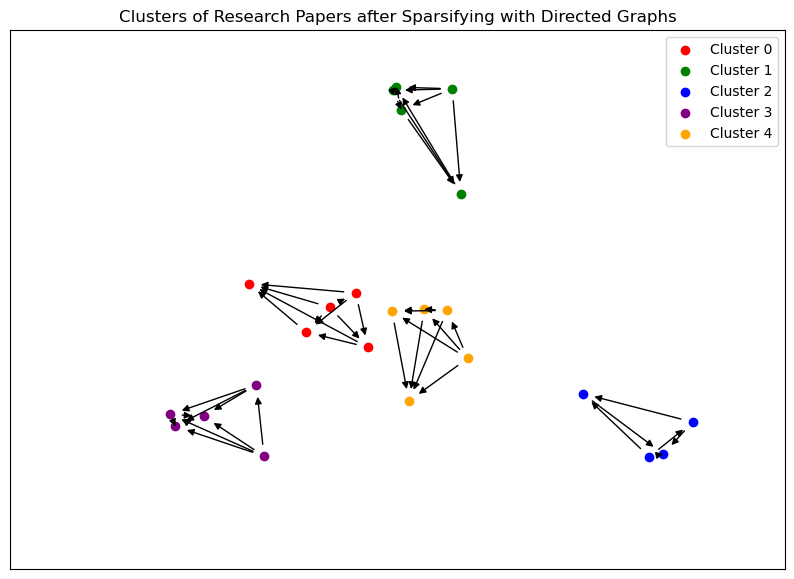

In [13]:
plt.figure(figsize=(10, 7))
plt.axis([-0.7, 0.7, -0.5, 0.5])

for cluster in range(n_clusters):
    cluster_points = X_reduced_important[important_papers['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[cluster], label=f'Cluster {cluster}')

for cluster in range(n_clusters):
    cluster_papers = important_papers[important_papers['cluster'] == cluster]
    G = create_directed_graph(cluster_papers)
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw_networkx_edges(G, pos, arrows=True)

plt.legend(loc='upper right', frameon=True)
plt.title('Clusters of Research Papers after Sparsifying with Directed Graphs')
plt.show()


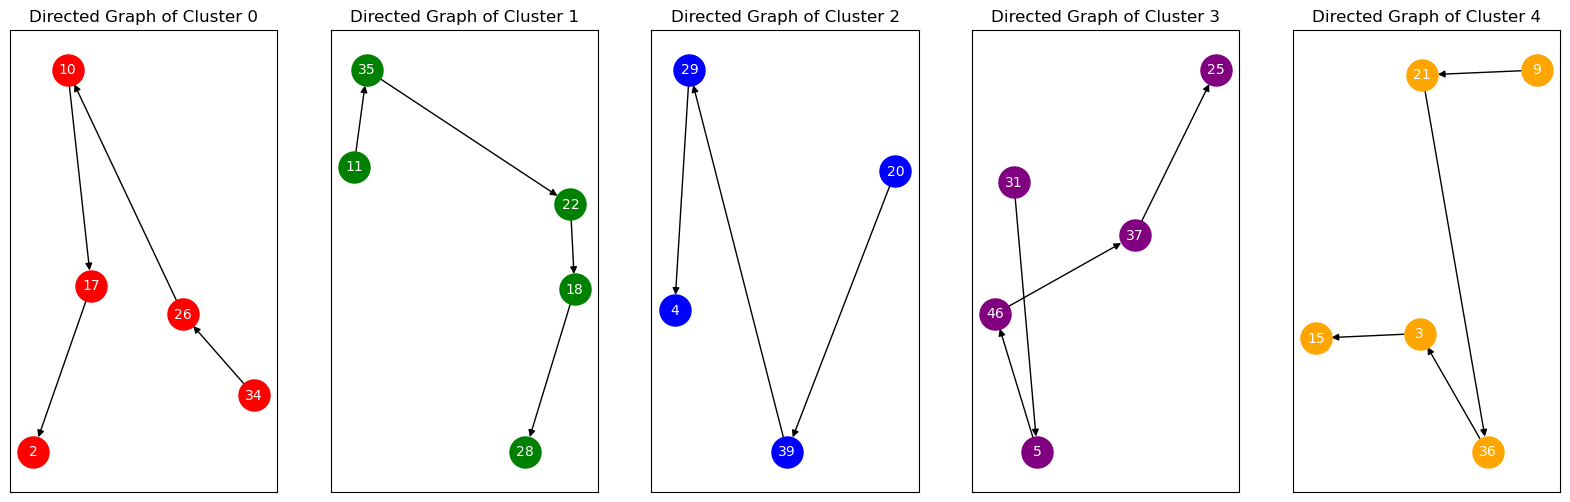

In [14]:
# Step 4: Minimum arborescence for each digraph 

# Positive side-effect:
# By defining edge weight to be difference in complexity scores and ignoring negative edge weights, 
# the node with the minimum complexity score will never have an incoming edge.
# Hence, every MSA must be rooted at the node with minimum complexity score.

fig, axs = plt.subplots(1, 5, figsize=(20, 6))
for cluster in range(n_clusters):
    msa = nx.minimum_spanning_arborescence(digraphs[cluster])
    pos = nx.spring_layout(msa)
    axs[cluster].set_title(f'Directed Graph of Cluster {cluster}')
    nx.draw_networkx(msa, pos, with_labels=True, node_color=colors[cluster], node_size=500, font_size=10, font_color='white', ax=axs[cluster])
plt.show()

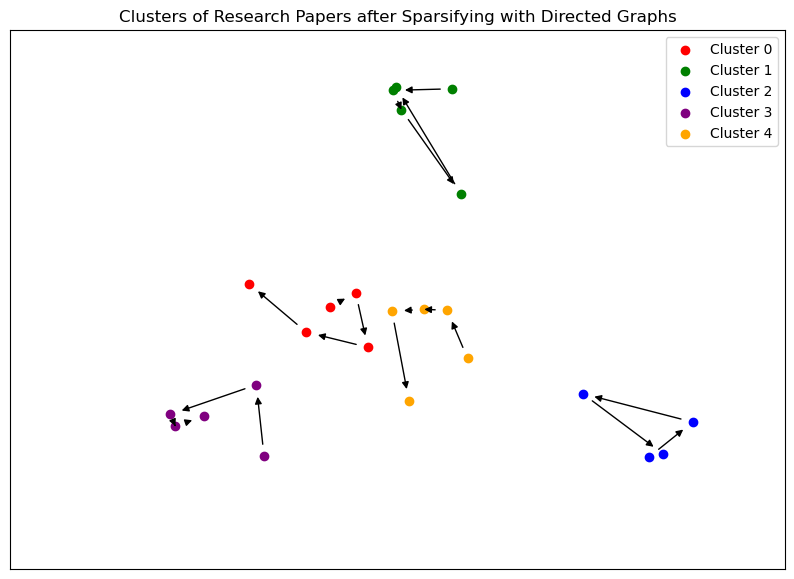

In [15]:
plt.figure(figsize=(10, 7))
plt.axis([-0.7, 0.7, -0.5, 0.5])

for cluster in range(n_clusters):
    cluster_points = X_reduced_important[important_papers['cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[cluster], label=f'Cluster {cluster}')

for cluster in range(n_clusters):
    msa = nx.minimum_spanning_arborescence(digraphs[cluster])
    pos = nx.get_node_attributes(digraphs[cluster], 'pos')
    nx.draw_networkx_edges(msa, pos, arrows=True)

plt.legend(loc='upper right', frameon=True)
plt.title('Clusters of Research Papers after Sparsifying with Directed Graphs')
plt.show()
